<a href="https://colab.research.google.com/github/MonSan436/Entregables2/blob/main/Entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**David Santiago Garzón Monje.**

**Matemáticas-Universidad Nacional de Colombia.**

**Ejercicios entregables 2: Introducción al aprendizaje de máquina.**

Para esta entrega estaré haciendo uso de las siguientes librerías.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

#Problema 1 (Ejercicio 1.12 del libro guía).

Una amiga te pregunta sobre un problema de aprendizaje. Ella dice que la función objetivo $f$ es totalmente desconocida, pero ella tiene 4000 ejemplos. Ella está dispuesta a pagarte para resolver su problema y producir para ella una función $g$ que aproxime a $f$. ¿Qué es lo mejor que puedes prometerle entre lo siguiente?

**(a)** Después de aprender tu le proporcionarás $g$ tal que garantizas que $g$ aproxima bien a $f$ fuera de los ejemplos.

**(b)** Después de aprender tu le proporcionarás $g$ tal que con muy alta probabilidad esta $g$ aproxima bien a $f$ fuera de los ejemplos.

**(c)** Se tienen alguno de los siguientes dos casos:

*(i)* Tu producirás una hipótesis $g$,

*(ii)* Tu dirás que no pudiste hallar tal $g$.

Y si tú produces una hipótesis $g$ entonces con alta probabilidad esta $g$ aproxima bien a $f$ fuera de los ejemplos.

**Solución.** Ya hemos visto que la función objetivo $f$ puede ser muy compleja, tanto que sea dificil ajustar los datos a una cierta hipótesis $g$; por tanto, de las opciones dadas la que tiene más sentido es la **(c)**, pues en esta aceptamos que $f$ puede ser demasiendo compleja. Además, de acuerdo a la desigualdad de Hoeffding:
$$\mathbb{P}[|\nu-\mu|>\epsilon]\leq 2e^{-2\epsilon^2N}\text{, donde $\nu$ es el error en la muestra y $\mu$ el error en la población;}$$
al ser $N=4000$ que es relativamente grande, se tiene que si producimos tal hipótesis $g$, los errores cometidos al aproximar con la función objetivo $f$ no serán grandes. En el sentido PAC, con alta probabilidad $g$ aproxima bien a $f$ fuera de los ejemplos.

#Problema 2 (Problema 1.2 del libro guía).

Considere el perceptrón en dos dimensiones $h(x)=\mbox{sign}(w^Tx)$ donde $w=[w_0,w_1,w_2]^T$ y $x=[1,x_1,x_2]^T$. Técnicamente, $x$ tiene 3 coordenadas, pero lo llamamos perceptrón de dos dimesiones porque la primera coordenada es fija en $1$.

**(a)** Demuestre que las regiones del plano donde $h(x)=1$ y $h(x)=-1$ están separadas por una recta. Si expresamos esta recta por la ecuación $x_2=a x_1+b$ ¿cuál es la pendiente $a$ y el intercepto $b$ en términos de $w_0,w_1,w_2$?

**(b)** Dibuje los casos $w=[1,2,3]^T$ y $w=-[1,2,3]^T$.

En más de dos dimensiones, las regiones $1$ y $-1$ están separadas por un hiperplano, la generalización de una línea.

**Solución.**

**(a)** Queremos ver el cambio de signo de $w^Tx=w_0+w_1x_1+w_2x_2$, como $w_0+w_1x_1+w_2x_2$ es una recta en el plano euclidiano $\mathbb{R}^2$ para ver dónde cambia de signo $w^Tx$, basta ver dónde es $w_0+w_1x_1+w_2x_2=0$. La última ecuación representa una recta, con ello probamos que las regiones del plano donde $h(x)=1$ y $h(x)=-1$ están separadas por una recta.

Si $w_2\neq0$ entonces la recta será $x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$; esto es la pendiende es $a=-\frac{w_1}{w_2}$ y el intercepto con el eje $X_2$ será $b=-\frac{w_0}{w_2}$.

Si $w_2=0$ entonces la recta será $w_0+w_1x_1=0$, para $w_1\neq0$, tenemos la recta vertical $x_1=-\frac{w_0}{w_1}$ y cuando $w_1=0$ no se son dice nada más a que $w_0$ debe ser $0$.

**(b)** Hagamos una función para la ecuación de una recta recta en dos dimensiones.


In [ ]:
def recta(w0,w1,w2,x):
  if w2!=0:
    return -(w0/w2)*x-w1/w2

*(i)* $w=[1,2,3]^T$

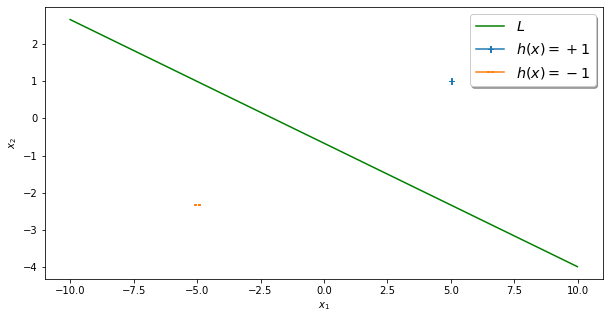

In [ ]:
a=-10
b=10
w0=1
w1=2
w2=3
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
p1=5
p2=-5
yp1=recta(w0,w1,w2,p2)
yp2=recta(w0,w1,w2,p1)
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$L$')
plt.plot( p1, yp1, marker='$+$',label='$h(x)=+1$')
plt.plot( p2, yp2, marker='$--$',label='$h(x)=-1$')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

*(ii)* $w=-[1,2,3]^T$

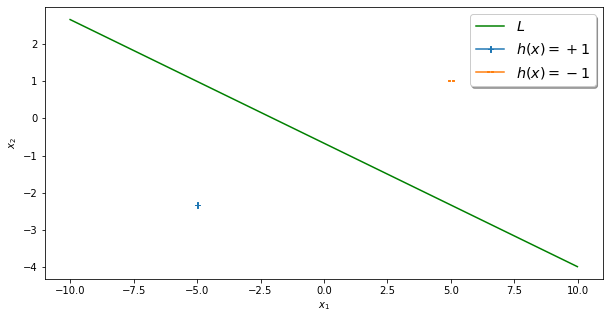

In [ ]:
a=-10
b=10
w0=-1
w1=-2
w2=-3
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
p1=-5
p2=5
yp1=recta(w0,w1,w2,p2)
yp2=recta(w0,w1,w2,p1)
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$L$')
plt.plot( p1, yp1, marker='$+$',label='$h(x)=+1$')
plt.plot( p2, yp2, marker='$--$',label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

#Problema 3 (Problema 1.4 del libro guía).

En el ejercicio 1.4 usamos un conjunto de datos artificial para estudiar el algoritmo de aprendizaje para el perceptrón. Este problema explora el algoritmo más allá con conjuntos de datos de diferentes tamaños y dimensiones.

**(a)** Generar un  conjunto de datos linealmente separable de tamaño 20 como se indica en el Ejercicio 1.4. Dibujar los ejemplos $\{(x_n,y_n)\}$ como la función objetivo $f$ en un plano. Asegurarse de marcar los ejemplos de diferentes clases de manera diferente, y agregar etiquetas a los ejes de la gráfica.

**(b)** Ejecute el algoritmo de aprendizaje del perceptrón en el conjunto de datos de arriba. Reporte el número de actualizaciones que el algoritmo hace antes de converger. Dibujar los ejemplos $\{(x_n,y_n)\}$, la función objetivo $f$, y la hipótesis final $g$ en la misma figura. Comentar si $f$ está cerca de $g$.

**(c)** Repita todo lo de **(b)** con otro conjunto de datos generado aleatoriamente de tamaño 20. Compara con **(b)**.

**(d)** Repita todo lo de **(b)** con otro conjunto de datos generado aleatoriamente de tamaño 100. Compara con **(b)**.

**(e)** Repita todo lo de **(b)** con otro conjunto de datos generado aleatoriamente de tamaño 1000. Compara con **(b)**.

**(f)** Modificar el algoritmo tal que tome $x_n\in\mathbb{R}^{10}$ en vez de $\mathbb{R}^{2}$. Aleatoreamente se genera un conjunto de datos linealmente separables de tamaño 1000 con $x_n\in\mathbb{R}^{10}$ y usarlo en el algoritmo. ¿Cuántos pasos toma el algoritmo para que haya convergencia?

**(g)** Repetir el algoritmo el en mismo conjunto de datos como en **(f)** para 100 experimentos. En la iteración de cada experimento, tome $x(t)$ aleatoriamente en vez de hacerlo deterministicamente. Grafique el histograma para el número de actualizaciones que el algoritmo tiene que hacer para converger.

**(h)** Resumir las conclusiones con respecto a la precisión y tiempo de ejecución como una función de $N$  y $d$.

Recordemos qué planteaba el ejercicio 1.4. Se toma $d=2$ en el problema del perceptrón y se escoge una línea aleatoria en el plano como la función objetivo, donde a un lado de la recta se escoge \+1 y en en otro \-1. Hay que escoger las entradas $x_n$ como puntos en el plano de manera aleatoria y evaluarlas en la función objetivo para obtener los respectivos $y_n$.

**Solución.**

**(a)** Primero implementemos la función signo en este caso

In [ ]:
def signo(w0,w1,w2,x,y):
  if w0+w1*x+w2*y>0:
    return 1
  if w0+w1*x+w2*y<0:
    return -1

In [ ]:
'Genrando los parámetros de la recta de manera aleatoria'
w0,w1,w2=np.random.rand(3)


In [ ]:
'Generando puntos aleatorios en el plano'
size=20
ejemplos=[]
for i in range(size):
 a=random.uniform(-10,10)
 b=random.uniform(-10,10)
 ejemplos.append([a,b])
print(ejemplos)

[[-9.216501987147067, 9.971627748373699], [8.950580733152027, 5.5630513167474245], [5.408208474014092, 8.291349987830458], [1.9980624869002899, -1.3967947984626221], [2.416955946191976, 7.680807800900151], [-7.734159266580427, 8.3843440519184], [2.125688653577029, -0.7200299340334873], [-2.73935609705436, -7.289170900586958], [6.6415477084281065, -1.0392012842869232], [2.3096614187312348, 3.272454033425479], [-1.1260032746855018, -9.56829773775285], [7.145940190531114, -4.0191358866749844], [-2.7978493228101486, 7.1832284960101696], [-1.77686858728128, -8.800797661907582], [5.946524363543386, -2.0154417390738892], [-0.8779519197569705, 8.795624922577552], [-8.874499661025556, -0.8717985218581799], [1.4716402951895269, -5.343628935159714], [6.6300404715097265, 3.3088926728903783], [0.6597909011185994, 7.38735793273014]]


In [ ]:
'Obteniendo las salidas para este conjunto de datos'
h=[signo(w0,w1,w2,ejemplos[i][0],ejemplos[i][1]) for i in range(size)]
print(h)

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1]


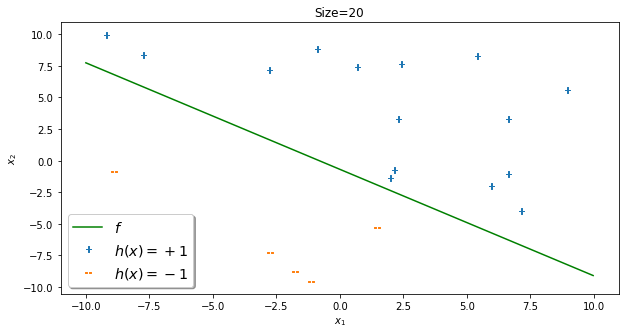

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$f$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=20")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**(b)** Implementemos el algoritmo de aprendizaje para el modelo de perceptrones en dos dimensiones.

In [ ]:
'Hago una función para escoger los ejemplos mal clasificados'
def malclasi(wt,wreal,ejemplos):
  b=[]
  for i in range(len(ejemplos)):
    if np.sign(wt[0]+wt[1]*ejemplos[i][0]+wt[2]*ejemplos[i][1]) != np.sign(wreal[0]+wreal[1]*ejemplos[i][0]+wreal[2]*ejemplos[i][1]):
      b.append([ejemplos[i][0],ejemplos[i][1]])
  return b

In [ ]:
'Perceptrón'
def percep(wreal,ejemplos, max):
  iteraciones=0
  w=np.random.rand(3)
  b=list(malclasi(w,wreal,ejemplos))
  while len(b)>0 and iteraciones<max:
    iteraciones=iteraciones+1
    d=random.choice(b)
    y=np.sign(wreal[0]+wreal[1]*d[0]+wreal[2]*d[1])
    w=w+[y,y*d[0],y*d[1]]
    b=list(malclasi(w,wreal,ejemplos))
  return w,iteraciones

In [ ]:
wreal=[w0,w1,w2]
w,iteracion=percep(wreal,ejemplos, max=100000)
print("w=",w,"\niteraciones hasta convergencia:", iteracion)

w= [11.37408024 11.3564627  12.00834761] 
iteraciones hasta convergencia: 11


De lo anterior vemos cual será el vector $w$ escogido por el algoritmo, además se necesitan 11 iteraciones para la convergencia. Hagamos las gráficas de lo que hemos obtenido.

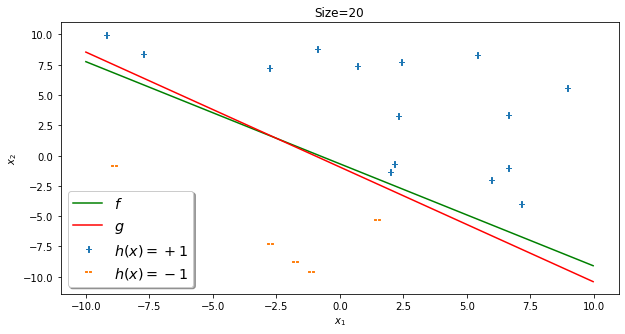

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
yreal=[recta(w0,w1,w2,i) for i in x]
yalgor=[recta(w[0],w[1],w[2],i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, yreal, 'g-',label='$f$')
plt.plot(x, yalgor, 'r-',label='$g$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=20")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Observación.** En este caso, la hipótesis $g$ producida está cerca de $f$.

**(c)** Ahora vamos a realizar lo anterior pero con otro conjunto de datos generado aleatoriamente.

In [ ]:
'Generando puntos aleatorios en el plano'
size=20
ejemplos=[]
for i in range(size):
 a=random.uniform(-10,10)
 b=random.uniform(-10,10)
 ejemplos.append([a,b])
print(ejemplos)

[[2.852822660577722, -4.277758860010492], [4.879958454503431, 9.811338635584562], [-7.24582254144746, -0.2631755265376938], [-8.870255946599832, -8.711108188284149], [-5.884354827248275, -1.9926965389512645], [-3.939860084340192, -7.6047174223633345], [7.902297727947342, -0.6096467585225245], [-7.088596845224644, -5.625455274622011], [7.914250178394838, -5.887864888642504], [6.445910259549677, 6.001065499112098], [-7.784675309015519, 5.7116083709617875], [3.8361534910820883, 0.7979853950409321], [-6.512258549106422, -3.071489257971831], [4.585040964783637, -4.759531450716863], [-1.496300043011452, -3.5153475245289023], [2.208124799304505, 4.836175199567524], [0.9423956541455585, 3.096437613599118], [-9.461399249712432, -0.020301140486690628], [-4.544700108054971, -2.5065830945402983], [-3.2522787915782985, -8.395035730327884]]


In [ ]:
'Obteniendo las salidas para este conjunto de datos'
h=[signo(w0,w1,w2,ejemplos[i][0],ejemplos[i][1]) for i in range(size)]
print(h)

[-1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1]


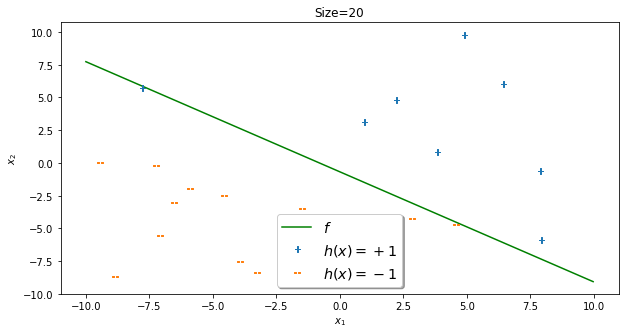

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$f$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=20")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
wreal=[w0,w1,w2]
w,iteracion=percep(wreal,ejemplos, max=100000)
print("w=",w,"\niteraciones hasta convergencia:", iteracion)

w= [ 8.43884947  8.96748449 10.94682064] 
iteraciones hasta convergencia: 24


De lo anterior vemos cual será el vector $w$ escogido por el algoritmo, además se necesitan 24 iteraciones para la convergencia. Hagamos las gráficas de lo que hemos obtenido.

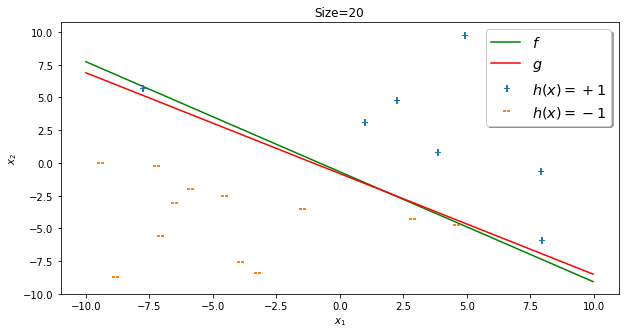

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
yreal=[recta(w0,w1,w2,i) for i in x]
yalgor=[recta(w[0],w[1],w[2],i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, yreal, 'g-',label='$f$')
plt.plot(x, yalgor, 'r-',label='$g$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=20")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Observación.** En este caso, la hipótesis $g$ producida está cerca de $f$. Además cabe anotar que el dato azul de la esquina superior izquierda pareciera no estar en el lado positivo de la función objetivo $f$; sin embargo, recuerda que el color azul indica precisamente que el signo en $f$ del dato es positivo, al clasificar. Conluyo que por errores de escala y marcado al usar plot, ocurre este error.

**(d)** Hagamos todo lo anterior, pero ahora con 100 ejemplos.

In [ ]:
'Generando puntos aleatorios en el plano'
size=100
ejemplos=[]
for i in range(size):
 a=random.uniform(-10,10)
 b=random.uniform(-10,10)
 ejemplos.append([a,b])
print(ejemplos)

[[2.5172805892387355, 7.723894242111044], [-3.642268468551122, -3.642909840806685], [5.514909151742861, 4.378995033556217], [4.483886542538574, 3.212550893724961], [7.904145048724082, 1.5876726261489686], [9.66618901494541, -7.216950050310729], [2.5673613475926675, 3.326827283622155], [-4.294876096300122, -5.6735194471201655], [4.553171893154296, 4.149861919531652], [0.5808674158441924, -5.790542409193094], [4.5152717346501365, 6.962336275116591], [3.4862457982548705, 7.104643059673428], [5.504298896077582, -2.3372158423760165], [1.1017032083654321, 2.5429733352669324], [1.3933767883527697, 1.8861475315794998], [1.2067873093680426, -1.2593464527971143], [7.615976020504661, 9.090517465027034], [-0.37392002939620994, -1.0866560920078054], [-4.918071654562071, -7.073502546943198], [8.650926478580057, -3.2826615806575488], [-9.693184444063515, -4.748611090348501], [-7.455485390051855, 5.1750762787170235], [-7.902522864362755, -3.5811450796557853], [-3.5291472215441155, 8.012965111871651], 

In [ ]:
'Obteniendo las salidas para este conjunto de datos'
h=[signo(w0,w1,w2,ejemplos[i][0],ejemplos[i][1]) for i in range(size)]
print(h)

[1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1]


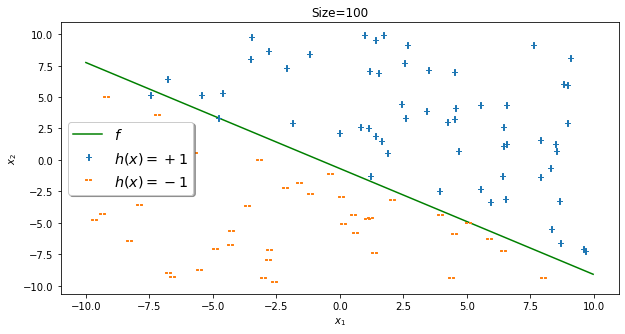

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$f$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=100")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Nota.** Aquí vale la misma anotación hecha sobre la escala del gráfico que el inciso anterior (algunos datos parecen no ser separables, pero justamente el color azul nos indica que sí lo son).

In [ ]:
wreal=[w0,w1,w2]
w,iteracion=percep(wreal,ejemplos, max=100000)
print("w=",w,"\niteraciones hasta convergencia:", iteracion)

w= [19.58383373 21.25849434 30.5737464 ] 
iteraciones hasta convergencia: 51


De lo anterior vemos cual será el vector $w$ escogido por el algoritmo, además se necesitan 51 iteraciones para la convergencia. Hagamos las gráficas de lo que hemos obtenido.

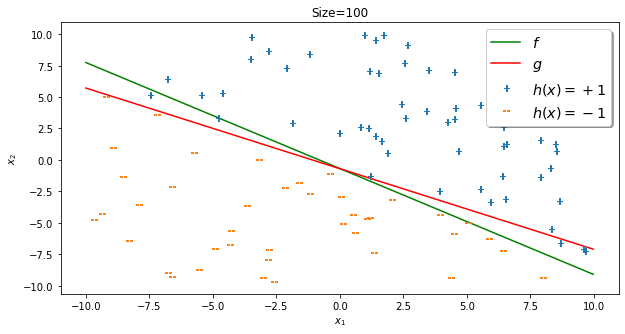

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
yreal=[recta(w0,w1,w2,i) for i in x]
yalgor=[recta(w[0],w[1],w[2],i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, yreal, 'g-',label='$f$')
plt.plot(x, yalgor, 'r-',label='$g$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=100")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Observación.** En este caso, la hipótesis $g$ producida está **NO** parece estar tan cerca de $f$ como en los casos anteriores (puede ser que la norma pointwise sea mayor que en los incisos anteriores sobre este intervalo); sin embargo, clasifica bien.
.

**(e)** Hagamos todo lo anterior, pero ahora con 1000 ejemplos.

In [ ]:
'Generando puntos aleatorios en el plano'
size=1000
ejemplos=[]
for i in range(size):
 a=random.uniform(-10,10)
 b=random.uniform(-10,10)
 ejemplos.append([a,b])
print(ejemplos)

[[0.003545767024524693, 7.923391622963059], [-9.485338203980959, -7.078837701288043], [2.30689686887116, -7.703722315376478], [6.004685883073805, -5.49010490603049], [3.7966272547624857, -9.325489472297493], [8.65704081159442, 4.446269644467256], [-8.751283534626925, -3.732291808013633], [6.236537323851138, 5.936609150887733], [1.9080024618679925, -1.0053965912619596], [-4.371813432535127, 4.088175632866427], [2.55881209568825, 2.2748555977108413], [-1.1478638336098772, 8.755782918569935], [3.256808771908686, 3.449645094241397], [0.7915294546535527, -0.9144914199976135], [0.6804995205859043, 1.8456613245020002], [7.7476446823823295, -1.806688918211119], [7.972846956527402, 7.045516352602949], [-6.351597345999229, 0.7150412010076916], [-5.649762607119991, 6.997767354998583], [-7.1385517689586475, 4.708237578137771], [5.229268456021323, 8.445951926006035], [3.572269010700568, 1.9275124094107028], [-2.3316652880347988, -9.005899405443795], [-1.0758759225558716, 3.151633419279989], [-1.333

In [ ]:
'Obteniendo las salidas para este conjunto de datos'
h=[signo(w0,w1,w2,ejemplos[i][0],ejemplos[i][1]) for i in range(size)]
print(h)

[1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1,

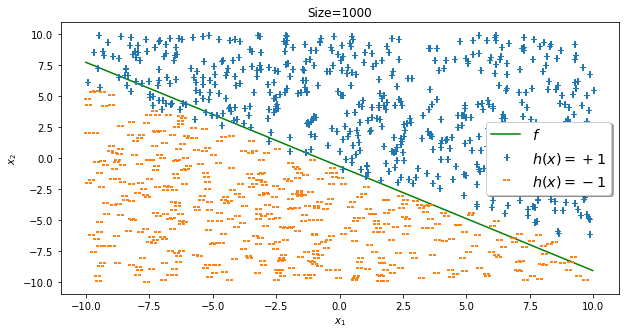

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
y=[recta(w0,w1,w2,i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g-',label='$f$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=1000")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Nota.** Entiéndase que sirve la misma anotación sobre la escala hecha ya varias veces.

In [ ]:
wreal=[w0,w1,w2]
w,iteracion=percep(wreal,ejemplos, max=100000)
print("w=",w,"\niteraciones hasta convergencia:", iteracion)

w= [38.6418443  31.20603516 46.11923881] 
iteraciones hasta convergencia: 126


De lo anterior vemos cual será el vector $w$ escogido por el algoritmo, además se necesitan 126 iteraciones para la convergencia. Hagamos las gráficas de lo que hemos obtenido.

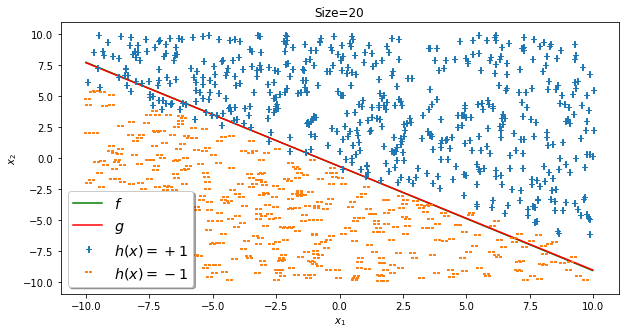

In [ ]:
'Graficando todo en un mismo plano'
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(h)):
  if h[i]==1:
    x1.append(ejemplos[i][0])
    y1.append(ejemplos[i][1])
  if h[i]==-1:
    x2.append(ejemplos[i][0])
    y2.append(ejemplos[i][1])
a=-10
b=10
x = np.arange(a, b, (b-a)/1000)
yreal=[recta(w0,w1,w2,i) for i in x]
yalgor=[recta(w[0],w[1],w[2],i) for i in x]
plt.figure(figsize=(10, 5))
plt.plot(x, yreal, 'g-',label='$f$')
plt.plot(x, yalgor, 'r-',label='$g$')
plt.plot( x1, y1, marker='$+$',linestyle="None",label='$h(x)=+1$')
plt.plot( x2, y2, marker='$--$',linestyle="None",label='$h(x)=-1$')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.title("Size=20")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Observación.** Notando la observación de la escala ya dicha varias veces, en este caso la hipótesis $g$ producida, parece ser casi idéntica a la función objetivo $f$.

**(f)** Veamos como podemos hacer lo anterior en dimensión 10.

In [ ]:
'Genrando los parámetros de la recta de manera aleatoria'
w=np.random.rand(11)


In [ ]:
'Generando puntos aleatorios en el plano'
size=1000
ejemplos=[]
for i in range(size):
  x=[1]
  for i in range(10):
    x.append(random.uniform(-10,10))
  ejemplos.append(x)
print(ejemplos)

[[1, -9.955971401739777, 4.419081599117707, -4.5097684266900036, -0.6982703595694222, -5.6009906017360755, 4.8058384156691965, -4.618448144849017, -5.092837878099255, 3.877356528955138, -0.2493658786054258], [1, -0.6230007482761337, -7.611713011707611, -0.2080712488663412, -1.669165235078916, 1.8838436156020926, -2.3395808532949536, -6.8870229980708375, 0.030343289073023527, -1.1816601401612417, -1.5319631943830245], [1, 1.7846539958846748, 8.938905566083925, -6.337869657954879, 8.341072273812987, 5.569279861163555, -5.090800930118213, -5.081716863592042, -8.407984224148219, -7.927232357932164, -6.024558465398949], [1, 7.711032694819309, -9.727312694921315, 2.7337022103345276, -2.1235429533113814, 6.3994412524264135, 6.4475457278872454, -8.396131509446088, 1.1696316535754292, 7.322883070193804, 0.19568241825863986], [1, -3.0649437063980622, 6.29746363967606, -1.8805820870885412, 3.9843890647173943, -8.080328004560783, 2.645852877362403, -1.8708459131089121, 4.533615317147701, 2.2139855

In [ ]:
'Obteniendo las salidas para este conjunto de datos'
h=[np.sign(np.dot(w,ejemplos[i])) for i in range(size)]
print(h)

[-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1

Implementemos el algoritmo de aprendizaje para el modelo de perceptrones para estas dimensiones.

In [ ]:
'Hago una función para escoger los ejemplos mal clasificados'
def malclasi(wt,wreal,ejemplos):
  b=[]
  for i in range(len(ejemplos)):
    if np.dot(wt,ejemplos[i]) != np.dot(wreal,ejemplos[i]):
      b.append(ejemplos[i])
  return b

In [ ]:
'Perceptrón'
def percep(wreal,ejemplos, max):
  iteraciones=0
  w=np.random.rand(11)
  b=list(malclasi(w,wreal,ejemplos))
  while len(b)>0 and iteraciones<max:
    iteraciones=iteraciones+1
    d=random.choice(b)
    y=np.sign(np.dot(wreal,d))
    w=w+np.dot(y,d)
    b=list(malclasi(w,wreal,ejemplos))
  return w,iteraciones

In [ ]:
wreal=w
w1,iteracion=percep(wreal,ejemplos, max=50000)
print("w=",w1,"\niteraciones hasta convergencia:", iteracion)

w= [ -1323.57605396  89739.66607431  53722.00287175  78360.33280151
  88076.46961641 132779.1639264   17784.66848725  38466.3604751
  41920.31738381  27512.1091852   85413.82884928] 
iteraciones hasta convergencia: 50000


De lo anterior vemos cual será el vector $w$ escogido por el algoritmo para este máximo de iteraciones.

**(g)** Ahora vamos a repetir el experimento anterior 100 veces. Solo lo hago para 10 experimentos porque para 100 no me alcanza el tiempo ni la bateria del compu.

In [ ]:
w=np.random.rand(11)
numIter=[]
for i in range(10):
  ejemplos=[]
  for i in range(size):
    x=[1]
    for i in range(10):
      x.append(random.uniform(-10,10))
    ejemplos.append(x)
  wreal=w
  w1,iteracion=percep(wreal,ejemplos, max=50000)
  numIter.append(iteracion)

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([49999.5, 49999.6, 49999.7, 49999.8, 49999.9, 50000. , 50000.1,
        50000.2, 50000.3, 50000.4, 50000.5]),
 <a list of 10 Patch objects>)

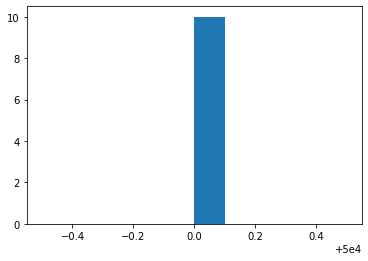

In [ ]:
plt.hist(numIter)

Vemos que para cada experimento fue necesario llegar al máximo de iteraciones propuesto.

**(e)** Veamos un resumen en la siguiente tabla.

In [ ]:
data={'d':[2,2,2,2,10,10,10,10,10,10,10,10,10,10,10],'N':[20,20,100,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000],
      't':[11,24,51,126,50000, 49999.6, 49999.7, 49999.8, 49999.9, 50000. , 50000.1, 50000.2, 50000.3, 50000.4, 50000.5]}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(20, 5))
plt.show()

  d     N        t
  2    20     11.0
  2    20     24.0
  2   100     51.0
  2  1000    126.0
 10  1000  50000.0
 10  1000  49999.6
 10  1000  49999.7
 10  1000  49999.8
 10  1000  49999.9
 10  1000  50000.0
 10  1000  50000.1
 10  1000  50000.2
 10  1000  50000.3
 10  1000  50000.4
 10  1000  50000.5 





<Figure size 1440x360 with 0 Axes>

Promediando para misma dimensiones y tamaño del data set, podemos resumir lo anterior en lo siguiente.

In [ ]:
data={'d':[2,2,2,10],'N':[20,100,1000,1000],
      't':[17.5,51,126,'>= 50000']}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(20, 5))
plt.show()

  d     N         t
  2    20      17.5
  2   100        51
  2  1000       126
 10  1000  >= 50000 





<Figure size 1440x360 with 0 Axes>

La última casilla para el tiempo indica que posiblemente se necesitan más pasos. Entiendase por tiempo al número de pasos requeridos en el algoritmo del perceptrón para tener convergencia.

**Conclusión.** Es claro que a mayor dimensión y mayor número de ejemplos (a cuadrar) en el conjunto de datos se tomarán más pasos en el algoritmo del perceptrón; ello va con la intuición pues al aumentar estos parámetros se va haciendo más complicado computacionalmente cuadrar los datos con lo que se quiere para la función objetivo, o llegar a una aproximación de esta.

Específicamente, en estos casos tratados para este ejercicio, notamos que al dejar fija la dimensión y aumentar el tamaño del data set, en escala de 10, el tiempo aumenta aproximadamente en proporción de 2.5. Cuando aumentamos dimensión (escala 10) el tiempo aumenta absurdamente.

#Problema 4 (Problema 1.6 del libro guía).

Considere un ejemplo de $10$ canicas extraídas independientemente de un contenedor que tiene canicas rojas y verdes. La probabilidad de una canica roja es $\mu$. Para $\mu=0.05$, $\mu=0.5$ y $\mu=0.8$, calcular la probabildad de que no se escogan canicas rojas ($\nu=0$) en los siguientes casos.

**(a)** Extraemos solo uno de tales ejemplos. Calcular la probabilidad de que $\nu=0$.

**(b)** Extraemos 1000 ejemplos de forma independiente. Calcular la probabilidad de que (al menos) uno de los ejemplos tenga $\nu=0$.

**(c)** Repetir **(b)** para 1000000 ejemplos independientes.

**Solución.**

**(a)** La probabilidad de no escoger canicas rojas, es la probabilidad de que no se escoja ninguna en su totalidad (población), como hay 10 canicas y cada una de ellas se puede extraer de manera independiente, entonces
$$\mathbb{P}(\nu=0)=(1-\mu)...(1-\mu)=(1-\mu)^{10}.$$

Esto es:

Para $\mu=0.05$, $\mathbb{P}(\nu=0)=0.5987$.

Para $\mu=0.5$, $\mathbb{P}(\nu=0)=0.000976$.

Para $\mu=0.8$, $\mathbb{P}(\nu=0)=1.02400e-7$.


**(b)** Suponga que extraemos $N$ ejemplos, llamemos a cada uno de ellos $E_i$ para $i=1,..,N$. Queremos calcular $\mathbb{P}(\bigcup_{i=1}^N E_i(\nu=0))$, pero 
\begin{align*}
  \mathbb{P}(\bigcup_{i=1}^N E_i(\nu=0))&=1-\mathbb{P}((\bigcup_{i=1}^N E_i(\nu=0))^C)
  \\&=1-\mathbb{P}(\bigcap_{i=1}^N E_i(\nu\not=0))
  \\&=1-\prod_{i=1}^N\mathbb{P}(E_i(\nu\not=0))\mbox{, los ejemplos se extraen de forma independiente}
  \\&=1-\prod_{i=1}^N(1-\mathbb{P}((E_i(\nu\not=0))^C)
  \\&=1-\prod_{i=1}^N(1-\mathbb{P}(E_i(\nu=0))
  \\&=1-\prod_{i=1}^N(1-(1-\mu)^{10})\mbox{, por el inciso anterior}
  \\&=1-(1-(1-\mu)^{10})^N.
\end{align*}

Para este ejercicio necesitamos N=1000.


In [1]:
def valores(mu,N):
  return 1-(1-(1-mu)**10)**N

In [2]:
N=1000
mu=[0.05,0.5,0.8]
for i in mu:
  print(valores(i,N))

1.0
0.623576201943276
0.00010239476257623004


Esto es:

Para $\mu=0.05$ la probabilidad buscada es 1.

Para $\mu=0.5$ la probabilidad buscada es 0.623.

Para $\mu=0.8$ la probabilidad buscada es 0.0001.

**(c)** Sirve el análisis hecho en el inciso anterior pero ahora tenemos $N=1000000.$

In [3]:
N=1000000
mu=[0.05,0.5,0.8]
for i in mu:
  print(valores(i,N))

1.0
1.0
0.09733159268316072


Esto es:

Para $\mu=0.05$ la probabilidad buscada es 1.

Para $\mu=0.5$ la probabilidad buscada es 1.

Para $\mu=0.8$ la probabilidad buscada es 0.097.

#Problema 5 (Problema 1.9 del libro guía).

En este problema, deducimos una forma de la ley de los grandes números que tienen una cota exponencial, llamemosla cota de *Chernoff*. Nos enfocaremos en el simple caso de lanzar una moneda aleatoriamente y usa una aproximación similar al Problema 1.8.

**(a)** Sean $t$ una variavle aleatoria (finita), $\alpha$ una constante positiva y $s$ un parámetro positivo. Si $T(s)=\mathbb{E}_t(e^{st})$ demostrar que 
$$\mathbb{P}[t\geq\alpha]\leq e^{-s\alpha}T(s).$$

[**Sugerencia:** $e^{st}$ es monótona estrictamente creciente en $t$.]

**(b)** Sean $u_1,u_2,...,u_n$ variables aleatorias iid y sea $u=\frac{1}{N}\sum_{n=1}^N u_n$. Si $U(s)=\mathbb{E}_{u_n}(e^{su_n})$ (para cualquier $n$). Demostrar que 
$$\mathbb{P}[u\geq\alpha]\leq(e^{-s\alpha}U(s))^N.$$

**(c)** Suponga que $\mathbb{P}[u_n=0]=\mathbb{P}[u_n=1]=\frac{1}{2}$. Evalue $U(s)$ como una función de $s$, y minimiza $e^{-s\alpha}U(s)$ respecto a $s$ para $\alpha$ fijo, $0<\alpha<1$.

**(d)** Concluir en **(c)** que, para $0<\epsilon<\frac{1}{2}$,
$$\mathbb{P}[u\geq\mathbb{E}(u)+\epsilon]\leq 2^{-\beta N},$$

donde $\beta=1+\left(\frac{1}{2}+\epsilon\right)log_2\left(\frac{1}{2}+\epsilon\right)+\left(\frac{1}{2}-\epsilon\right)log_2\left(\frac{1}{2}-\epsilon\right)$ y $\mathbb{E}(u)=\frac{1}{2}.$ Demostrar que $\beta>0$, por lo tanto la cota es exponencialmente decreciente en $N$.

**Solución.**

**(a)** *Demostración.*
\begin{align*}
  T(s)&=\mathbb{E}_t(e^{st})=\int_0^\infty e^{st}p(t)dt=\int_0^\alpha e^{st}p(t)dt+\int_\alpha^\infty e^{st}p(t)dt
  \\&\geq \int_\alpha^\infty e^{st}p(t)dt\geq \int_\alpha^\infty e^{s\alpha}p(t)dt=e^{s\alpha}\int_\alpha^\infty p(t)dt=e^{s\alpha}\mathbb{P}(t\geq a).
\end{align*}

**(b)** *Demostración.* Tomando $t=Nu$ en el inciso anterior, tenemos que
\begin{align*}
\mathbb{P}(u\geq\alpha)&=\mathbb{P}(Nu\geq N\alpha)\leq e^{-sN\alpha}\mathbb{E}_t(e^{sNu})
\\&=e^{-sN\alpha}\mathbb{E}_t(e^{s\sum_{n=1}^Nu_n})=e^{-sN\alpha}\mathbb{E}_t(\prod_{n=1}^Ne^{s u_n})
\\&=e^{-sN\alpha}\prod_{n=1}^N\mathbb{E}_t(e^{s u_n})\mbox{, variables independientes.}
\\&=e^{-sN\alpha}\mathbb{E}_t(e^{su_n})^N\mbox{, variables idénticamente distribuidas.}
\\&=(e^{-s\alpha}U(s))^N.
\end{align*}

**(c)** $$U(s)=\mathbb{E}_t(e^{su_n})=e^{s\cdot 0}\mathbb{P}(u_n=0)+e^{s\cdot 1}\mathbb{P}(u_n=1)=(1+e^{s})/2.$$ 
Luego $$g(s)=e^{-s\alpha}U(s)=(e^{-s\alpha}+e^{-s\alpha+s})/2,$$
note que $$g'(s)=(-\alpha e^{-s\alpha}+(1-\alpha)e^{-s\alpha+s})/2$$
y si $g'(s)=0$ es porque $$-\alpha e^{-s\alpha}+(1-\alpha)e^{-s\alpha+s}=0$$
o bien $$-\alpha+(1-\alpha)e^s=0;$$
esto es, 
$$s=\ln{\frac{\alpha}{1-\alpha}}\mbox{, para $0<\alpha<1$.}$$ 
Además 
$$g''(s)=(\alpha^2e^{-s\alpha}+(1-\alpha)^2e^{-s\alpha+s}\geq0.$$
 Por todo lo anterior, estamos con total seguridad de que $e^{-s\alpha}U(s)$ alcanza un mínimo en $s=\ln{\frac{\alpha}{1-\alpha}}$ (con $0<\alpha<1$). 

 **(d)** Note que $\mathbb{E}(u)=\frac{1}{N}\sum_{n=1}^N \mathbb{E}(u_n)=\mathbb{E}(u_n)=0\cdot\mathbb{P}(u_n=0)+1\cdot\mathbb{P}(u_n=1)=1/2$. Ahora sean $\epsilon\in(0,1/2)$ y $\alpha=\mathbb{E}(u)+\epsilon=1/2+\epsilon$. Por la parte **(b)** se tiene que 
 $$P(u\geq \mathbb{E}(u)+\epsilon)\leq (e^{-s\alpha}U(s))^N,$$

 veamos qué es $e^{-s\alpha}U(s)$ con $s=\ln{\frac{\alpha}{1-\alpha}}.$

 \begin{align*}
  e^{-s\alpha}U(s)&=e^{-s\alpha}\left(\frac{1+e^{s}}{2}\right)
  \\&=\left(\frac{1-\alpha}{\alpha}\right)^\alpha\left(\frac{1+\frac{\alpha}{1-\alpha}}{2}\right)
  \\&=\frac{1}{2}\frac{(1-\alpha)^{\alpha-1}}{\alpha^\alpha}
  \\&=\frac{1}{2}\frac{\left(\frac{1}{2}-\epsilon\right)^{\epsilon-\frac{1}{2}}}{\left(\frac{1}{2}+\epsilon\right)^{\frac{1}{2}+\epsilon}}
  \\&=\frac{1}{2}\left(\frac{1}{2}-\epsilon\right)^{-\left(\frac{1}{2}-\epsilon\right)}\left(\frac{1}{2}+\epsilon\right)^{-\left(\frac{1}{2}+\epsilon\right)}
  \\&=2^{-1}2^{\log_2{\left(\frac{1}{2}-\epsilon\right)^{-\left(\frac{1}{2}-\epsilon\right)}}}2^{\log_2{\left(\frac{1}{2}+\epsilon\right)^{-\left(\frac{1}{2}+\epsilon\right)}}}
  \\&=2^{-1}2^{-\left(\frac{1}{2}-\epsilon\right)\log_2{\left(\frac{1}{2}-\epsilon\right)}}2^{-\left(\frac{1}{2}+\epsilon\right)\log_2{\left(\frac{1}{2}+\epsilon\right)}}
  \\&=2^{-\left(1+\left(\frac{1}{2}-\epsilon\right)\log_2{\left(\frac{1}{2}-\epsilon\right)}+\left(\frac{1}{2}+\epsilon\right)\log_2{\left(\frac{1}{2}+\epsilon\right)}\right)}
  \\&=2^{-\beta},
 \end{align*}

 donde $\beta=1+\left(\frac{1}{2}+\epsilon\right)\log_2{\left(\frac{1}{2}+\epsilon\right)}+\left(\frac{1}{2}-\epsilon\right)\log_2{\left(\frac{1}{2}-\epsilon\right)}$.


 Ahora veamos que $\beta$ es positivo. En efecto, recuerde que $\epsilon\in(0,1/2)$; además

\begin{align*}
 \beta'(\epsilon)&=\log_2{\left(\frac{1}{2}+\epsilon\right)}+\left(\frac{1}{2}+\epsilon\right)\frac{1}{\ln{2}\left(\frac{1}{2}+\epsilon\right)}-\log_2{\left(\frac{1}{2}-\epsilon\right)}-\left(\frac{1}{2}-\epsilon\right)\frac{1}{\ln{2}\left(\frac{1}{2}-\epsilon\right)}
 \\&=\log_2{\left(\frac{1}{2}+\epsilon\right)}+\frac{1}{\ln{2}}-\log_2{\left(\frac{1}{2}-\epsilon\right)}-\frac{1}{\ln{2}}
 \\&=\log_2{\left(\frac{1}{2}+\epsilon\right)}-\log_2{\left(\frac{1}{2}-\epsilon\right)}
 \\&=\log_2{\left(\frac{\frac{1}{2}+\epsilon}{\frac{1}{2}-\epsilon}\right)}
\end{align*}

Ahora, como $\epsilon>0$ se tiene que $2\epsilon>-2\epsilon$ luego $1+2\epsilon>1-2\epsilon$ y como $\epsilon<1/2$ (es decir que $1-2\epsilon>0$), entonces  $\frac{1+2\epsilon}{1-2\epsilon}>1$ es decir que $\frac{\frac{1}{2}+\epsilon}{\frac{1}{2}-\epsilon}>1$ y por tanto $\beta'=\log_2{\left(\frac{\frac{1}{2}+\epsilon}{\frac{1}{2}-\epsilon}\right)}>0$; así, $\beta$ es una función creciente en $\epsilon\in[0,1/2]$, además $\beta(0)=0$, luego $\beta>0$ para $\epsilon\in(0,1/2)$ como se quería demostrar. 

Hemos demostrado la cota exponencial decreciente en $N$.